In [3]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

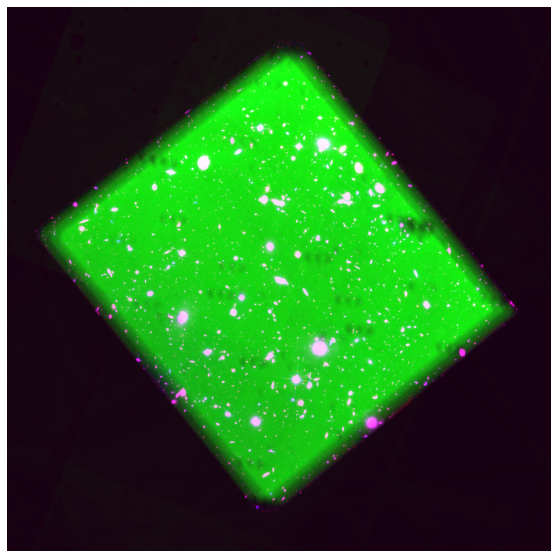

In [5]:
def scale_image(data, clip_percentile=99):
    vmin, vmax = np.percentile(data, [100-clip_percentile, clip_percentile])
    data = np.clip(data, vmin, vmax)
    data = (data - vmin) / (vmax - vmin)
    return data

with fits.open('hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits') as hdul:
    data_r = hdul[0].data
with fits.open('hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_wht.fits') as hdul:
    data_g = hdul[0].data
with fits.open('hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits') as hdul:
    data_b = hdul[0].data

data_r_scaled = scale_image(data_r)
data_g_scaled = scale_image(data_g)
data_b_scaled = scale_image(data_b)

rgb_image = np.dstack((data_r_scaled, data_g_scaled, data_b_scaled))

plt.figure(figsize=(10, 10))
plt.imshow(rgb_image, origin='lower')
plt.axis('off')
plt.show()